# Credit EDA Case Study

#### This notebook contains the Exploratory Data Analysis code and details to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Load required libraries 

In [319]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.5f}'.format

### 1. Load application data set 

In [320]:
df_application = pd.read_csv('application_data.csv')

In [321]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,nan,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08304,0.26295,0.13938,0.02470,0.03690,0.97220,0.61920,0.01430,0.00000,0.06900,0.08330,0.12500,0.03690,0.02020,0.01900,0.00000,0.00000,0.02520,0.03830,0.97220,0.63410,0.01440,0.00000,0.06900,0.08330,0.12500,0.03770,0.02200,0.01980,0.00000,0.00000,0.02500,0.03690,0.97220,0.62430,0.01440,0.00000,0.06900,0.08330,0.12500,0.03750,0.02050,0.01930,0.00000,0.00000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,nan,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,nan,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / 

### 2. Check the strcture of the data (Normal routine check)

In [322]:
# Check the total number of rows and columns present in data set
print("Application data set contains {0} colmuns and {1} rows.".format(df_application.shape[1], df_application.shape[0])) 

Application data set contains 122 colmuns and 307511 rows.


In [323]:
# Get the descriptive statistics for application data set
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,104582.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307509.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,134133.00000,306851.00000,246546.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,159080.00000,306490.00000,306490.00000,306490.00000,306490.00000,307510.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,12.06109,1.00000,0.81989,0.19937,0.99813,0.28107,0.05672,2.15267,2.05246,2.03152,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.50213,0.51439,0.51085,0.11744,0.08844,0.97773,0.75247,0.04462,0.07894,0.14972,0.22628,0.23189,0.06633,0.10077,0.10740,0.00881,0.02836,0.11423,0.08754,0.97707,0.75964,0.04255,0.07449,0.14519,0.22232,0.22806,0.06496,0.10564,0.10598,0.00808,0.02702,0.11785,0.08795,0.97775,0.75575,0.04460,0.07808,0.14921,0.22590,0.23162,0.06717,0.10195,0.10861,0.00865,0.02824,0.10255,1.42225,0.14342,1.40529,0.10005,-962.85879,0.00004,0.71002,0.0

In [324]:
# Get the info about data set
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 3. Cleaning data set (treatment of missing values)

#### 3.1 Find the pecentage of missing values for all columns

In [325]:
series_missing_data = (df_application.isnull().sum()/len(df_application))*100
series_missing_data

SK_ID_CURR                     0.00000 
TARGET                         0.00000 
NAME_CONTRACT_TYPE             0.00000 
CODE_GENDER                    0.00000 
FLAG_OWN_CAR                   0.00000 
FLAG_OWN_REALTY                0.00000 
CNT_CHILDREN                   0.00000 
AMT_INCOME_TOTAL               0.00000 
AMT_CREDIT                     0.00000 
AMT_ANNUITY                    0.00390 
AMT_GOODS_PRICE                0.09040 
NAME_TYPE_SUITE                0.42015 
NAME_INCOME_TYPE               0.00000 
NAME_EDUCATION_TYPE            0.00000 
NAME_FAMILY_STATUS             0.00000 
NAME_HOUSING_TYPE              0.00000 
REGION_POPULATION_RELATIVE     0.00000 
DAYS_BIRTH                     0.00000 
DAYS_EMPLOYED                  0.00000 
DAYS_REGISTRATION              0.00000 
DAYS_ID_PUBLISH                0.00000 
OWN_CAR_AGE                    65.99081
FLAG_MOBIL                     0.00000 
FLAG_EMP_PHONE                 0.00000 
FLAG_WORK_PHONE                0.00000 


#### 3.2 Remove columns with high missing values  (i.e. any column which is having 50% or more null values)

In [326]:
#Drop all the columns having nearly 50% of null values
drop_col_list = series_missing_data.index[(df_application.isnull().sum()/len(df_application))*100 >= 50]
df_application.drop(drop_col_list, axis=1, inplace=True)
series_missing_data.drop(drop_col_list, inplace=True)
print("There are {} columns having 50% or more null values, which we have dropped from application data set.".format(len(drop_col_list)))

There are 41 columns having 50% or more null values, which we have dropped from application data set.


In [327]:
# Check the shape of the data set after removing columns with null values
df_application.shape

(307511, 81)

Since, there are still 81 columns in data set, we have decided to select following columns for further data analysis.

1. SK_ID_CURR
2. TARGET
3. NAME_CONTRACT_TYPE
4. CODE_GENDER
5. FLAG_OWN_CAR
6. FLAG_OWN_REALTY
7. CNT_CHILDREN
8. AMT_INCOME_TOTAL
9. AMT_CREDIT
10. AMT_ANNUITY
11. AMT_GOODS_PRICE
12. NAME_TYPE_SUITE
13. NAME_INCOME_TYPE
14. NAME_EDUCATION_TYPE
15. NAME_FAMILY_STATUS
16. NAME_HOUSING_TYPE
17. REGION_POPULATION_RELATIVE
18. DAYS_BIRTH
19. DAYS_EMPLOYED
20. OWN_CAR_AGE
21. FLAG_MOBIL
22. FLAG_EMP_PHONE
23. FLAG_WORK_PHONE
24. OCCUPATION_TYPE
25. CNT_FAM_MEMBERS
26. REGION_RATING_CLIENT
27. REGION_RATING_CLIENT_W_CITY
28. ORGANIZATION_TYPE
29. EXT_SOURCE_1
30. EXT_SOURCE_2
31. EXT_SOURCE_3AMT_REQ_CREDIT_BUREAU_HOUR
32. AMT_REQ_CREDIT_BUREAU_DAY
33. AMT_REQ_CREDIT_BUREAU_WEEK
34. AMT_REQ_CREDIT_BUREAU_MON
35. AMT_REQ_CREDIT_BUREAU_QRT
36. AMT_REQ_CREDIT_BUREAU_YEAR
37. DAYS_REGISTRATION

In [328]:
selected_col_list = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',\
                     'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',\
                     'AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',\
                     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',\
                     'DAYS_REGISTRATION','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',\
                     'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',\
                     'ORGANIZATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR',\
                     'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',\
                     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
cols_to_remove = [col for col in df_application.columns if col not in selected_col_list]
df_application.drop(cols_to_remove, axis = 1, inplace=True)
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,1,1,0,Laborers,1.00000,2,2,Business Entity Type 3,0.26295,0.13938,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,1,1,0,Core staff,2.00000,1,1,School,0.62225,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,-19046,-225,-4260.00000,1,1,1,Laborers,1.00000,2,2,Government,0.55591,0.72957,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,1,1,0,Laborers,2.00000,2,2,Business Entity Type 3,0.65044,nan,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02866,-19932,-3038,-4311.00000,1,1,0,Core staff,1.00000,2,2,Religion,0.32274,nan,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


#### 3.3 Impute the missing values with appropriate metric/ method

First check for columns which are having less percentage of missing values (i.e. around 13% or even less)

In [329]:
# Create dataframe with column names, missing value percentage and their data type for analysis
df_impute = pd.DataFrame([series_missing_data.index, series_missing_data.tolist(), df_application.dtypes.tolist()])
df_impute.T

,0,1,2
0,SK_ID_CURR,0.00000,int64
1,TARGET,0.00000,int64
2,NAME_CONTRACT_TYPE,0.00000,object
3,CODE_GENDER,0.00000,object
4,FLAG_OWN_CAR,0.00000,object
5,FLAG_OWN_REALTY,0.00000,object
6,CNT_CHILDREN,0.00000,int64
7,AMT_INCOME_TOTAL,0.00000,float64
8,AMT_CREDIT,0.00000,float64
9,AMT_ANNUITY,0.00390,float64


After analysing the missing values percent and data types for columns, we have selected below columns which are having less percentage of missing values and of different data types to impute missing values:

1. AMT_REQ_CREDIT_BUREAU_YEAR (float)
2. AMT_REQ_CREDIT_BUREAU_HOUR (float)
3. AMT_REQ_CREDIT_BUREAU_WEEK (float)
4. AMT_GOODS_PRICE (float)
5. NAME_TYPE_SUITE(Object)
6. EXT_SOURCE_2(float)

#### Impute missing data with Mode
First handle the simple case of <b> Categorial </b> variable which is <i>NAME_TYPE_SUITE</i>. Since, it is categorial missing data, we can <b>impute the missing values using <u>Mode</u></b>.

In [330]:
df_application['NAME_TYPE_SUITE'].fillna(df_application['NAME_TYPE_SUITE'].mode()[0], inplace=True)

For all remaining 5 numeric columns, we have first handle any missing values such as " "

In [331]:
df_application.AMT_REQ_CREDIT_BUREAU_YEAR = pd.to_numeric(df_application.AMT_REQ_CREDIT_BUREAU_YEAR, errors = 'coerce')
df_application.AMT_REQ_CREDIT_BUREAU_HOUR = pd.to_numeric(df_application.AMT_REQ_CREDIT_BUREAU_HOUR, errors = 'coerce')
df_application.AMT_REQ_CREDIT_BUREAU_WEEK = pd.to_numeric(df_application.AMT_REQ_CREDIT_BUREAU_WEEK, errors = 'coerce')
df_application.AMT_GOODS_PRICE = pd.to_numeric(df_application.AMT_GOODS_PRICE, errors = 'coerce')
df_application.EXT_SOURCE_2 = pd.to_numeric(df_application.EXT_SOURCE_2, errors = 'coerce')

Now for <b>Continuous</b> variables, get descriptive statistics to analyse <b>Mean, Median and Percentile variation</b>

In [332]:
impute_col_list = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2']
df_application[impute_col_list].describe(percentiles = [0.05,.10,.25,.50,.75,.90,.95,.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
AMT_REQ_CREDIT_BUREAU_YEAR,265992.00000,1.89997,1.86929,0.00000,0.00000,0.00000,0.00000,1.00000,3.00000,4.00000,6.00000,8.00000,25.00000
AMT_REQ_CREDIT_BUREAU_HOUR,265992.00000,0.00640,0.08385,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000
AMT_REQ_CREDIT_BUREAU_WEEK,265992.00000,0.03436,0.20468,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,8.00000
AMT_GOODS_PRICE,307233.00000,538396.20743,369446.46054,40500.00000,135000.00000,180000.00000,238500.00000,450000.00000,679500.00000,1093500.00000,1305000.00000,1800000.00000,4050000.00000
EXT_SOURCE_2,306851.00000,0.51439,0.19106,0.00000,0.13330,0.21569,0.39246,0.56596,0.66362,0.72205,0.74773,0.78279,0.85500


#### Impute missing data with Mean
Based on analysis of Mean and Median and percentile variation for AMT_REQ_CREDIT_BUREAU_YEAR & EXT_SOURCE_2 columns,we have decided to impute the Mean for missing values.

In [333]:
df_application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_application['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)
df_application['EXT_SOURCE_2'].fillna(df_application['EXT_SOURCE_2'].mean(), inplace=True)

#### Impute missing data with Median
For AMT_GOODS_PRICE column min and max value range from 40500 to 4050000. Also, Mean for AMT_GOODS_PRICE column is 538396.207429 and Median is 450000. Hence, considering Mean, Median and Percentile distribution, we have deicided to impute null values for AMT_GOODS_PRICE column with Median.

In [334]:
df_application['AMT_GOODS_PRICE'].fillna(df_application['AMT_GOODS_PRICE'].median(), inplace=True)

#### Impute missing values with zero (0)
Based on analysis of Mean and Median for AMT_REQ_CREDIT_BUREAU_HOUR & AMT_REQ_CREDIT_BUREAU_WEEK columns,we have decided we can impute the zero (0) for missing values as both mean and median are approximately zero value.

To confirm our assumption, lets analyse the value counts for these two columns.

In [335]:
print(df_application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())

0.00000    264366
1.00000    1560  
2.00000    56    
3.00000    9     
4.00000    1     
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


In [336]:
print(df_application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

0.00000    257456
1.00000    8208  
2.00000    199   
3.00000    58    
4.00000    34    
6.00000    20    
5.00000    10    
8.00000    5     
7.00000    2     
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


Based on the above value counts it is clear that majority of data contains zero (0) values and hence we can impute the zero for missing values.

In [337]:
# Impute zero vlaues for missing values
df_application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
df_application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)

Verify the value counts for both the columns after replacing null values with zero

In [338]:
print(df_application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts())

0.00000    305885
1.00000    1560  
2.00000    56    
3.00000    9     
4.00000    1     
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


In [339]:
print(df_application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts())

0.00000    298975
1.00000    8208  
2.00000    199   
3.00000    58    
4.00000    34    
6.00000    20    
5.00000    10    
8.00000    5     
7.00000    2     
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


Verify that there are no null values for our selected 6 columns after imputing the values.

In [340]:
df_application[impute_col_list].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_GOODS_PRICE               0
EXT_SOURCE_2                  0
dtype: int64

#### 3.4 Check the data types of columns and if needed change the data type

In [341]:
#Check the data type of columns
df_application.dtypes

SK_ID_CURR                     int64  
TARGET                         int64  
NAME_CONTRACT_TYPE             object 
CODE_GENDER                    object 
FLAG_OWN_CAR                   object 
FLAG_OWN_REALTY                object 
CNT_CHILDREN                   int64  
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                object 
NAME_INCOME_TYPE               object 
NAME_EDUCATION_TYPE            object 
NAME_FAMILY_STATUS             object 
NAME_HOUSING_TYPE              object 
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     int64  
DAYS_EMPLOYED                  int64  
DAYS_REGISTRATION              float64
FLAG_MOBIL                     int64  
FLAG_EMP_PHONE                 int64  
FLAG_WORK_PHONE                int64  
OCCUPATION_TYPE                object 
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT     

#### Changing the data type of column  "CNT_FAM_MEMBERS"
After analysis of datatypes and column values, we have decided to change the datatype of "DAYS_REGISTRATION" & "CNT_FAM_MEMBERS" columns from Float to Integer, as no of family members and days of registration values are always Integers.

Handle the missing values

In [342]:
df_application['CNT_FAM_MEMBERS'] = pd.to_numeric(df_application['CNT_FAM_MEMBERS'], errors = 'coerce')
df_application['DAYS_REGISTRATION'] = pd.to_numeric(df_application['DAYS_REGISTRATION'], errors = 'coerce')
df_application['CNT_FAM_MEMBERS'].fillna(df_application['CNT_FAM_MEMBERS'].median(), inplace=True)
df_application['DAYS_REGISTRATION'].fillna(df_application['DAYS_REGISTRATION'].median(), inplace=True)

change the datatpye to Integer

In [343]:
df_application['CNT_FAM_MEMBERS'] = df_application['CNT_FAM_MEMBERS'].astype(int)
df_application['DAYS_REGISTRATION'] = df_application['DAYS_REGISTRATION'].astype(int)
print("Changed datatype of CNT_FAM_MEMBERS to {}".format(df_application['CNT_FAM_MEMBERS'].dtypes))
print("Changed datatype of DAYS_REGISTRATION to {}".format(df_application['DAYS_REGISTRATION'].dtypes))

Changed datatype of CNT_FAM_MEMBERS to int32
Changed datatype of DAYS_REGISTRATION to int32


#### 3.5 Check for outliers for numeric columns

In [344]:
# Lets check for outliers on the basis of statistical measures such as Mean, Median and Percentile Distribution
df_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.00000,278180.51858,102790.17535,100002.00000,189145.50000,278202.00000,367142.50000,456255.00000
TARGET,307511.00000,0.08073,0.27242,0.00000,0.00000,0.00000,0.00000,1.00000
CNT_CHILDREN,307511.00000,0.41705,0.72212,0.00000,0.00000,0.00000,1.00000,19.00000
AMT_INCOME_TOTAL,307511.00000,168797.91930,237123.14628,25650.00000,112500.00000,147150.00000,202500.00000,117000000.00000
AMT_CREDIT,307511.00000,599025.99971,402490.77700,45000.00000,270000.00000,513531.00000,808650.00000,4050000.00000
AMT_ANNUITY,307499.00000,27108.57391,14493.73732,1615.50000,16524.00000,24903.00000,34596.00000,258025.50000
AMT_GOODS_PRICE,307511.00000,538316.29437,369288.98225,40500.00000,238500.00000,450000.00000,679500.00000,4050000.00000
REGION_POPULATION_RELATIVE,307511.00000,0.02087,0.01383,0.00029,0.01001,0.01885,0.02866,0.07251
DAYS_BIRTH,307511.00000,-16036.99507,4363.98863,-25229.00000,-19682.00000,-15750.00000,-12413.00000,-7489.00000
DAYS_EMPLOYED,307511.00000,63815.04590,141275.76652,-17912.00000,-2760.00000,-1213.00000,-289.00000,365243.00000


Based on analysis of initial full columns in the above table, we have decided to analyse following columns which seems to have largely distributed data.

1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. DAYS_EMPLOYED

Lets analyse the CNT_CHILDREN using box plot

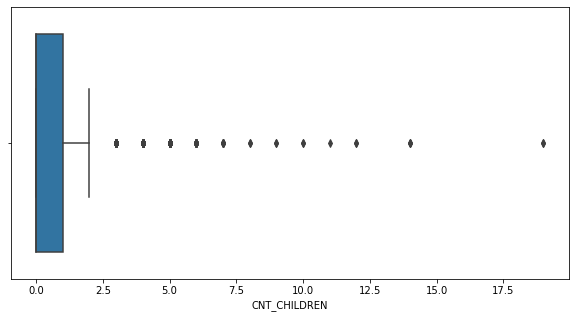

In [345]:
plt.figure(figsize=(10,5))
sns.boxplot(df_application['CNT_CHILDREN'])

#### Analysis for CNT_CHILDREN
The value of number children ranges from 0 to 19. For human having 19 children is not normal. Hence, we have considered this as outlier.

Lets analyse the AMT_INCOME_TOTAL using box plot

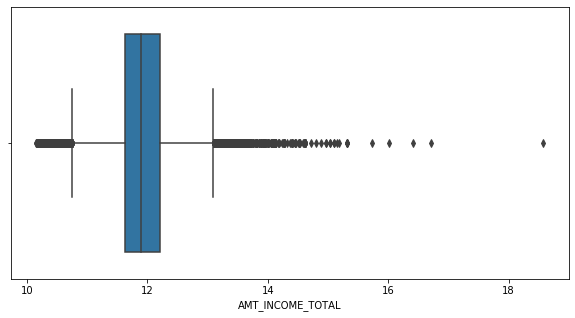

In [346]:
plt.figure(figsize=(10,5))
sns.boxplot(np.log(df_application['AMT_INCOME_TOTAL']))

#### Analysis for AMT_INCOME_TOTAL
The value of total income amount ranges from 25,650 to 117,000,000. We can definately consider the value of 117,000,000 as outlier based on Mean for AMT_INCOME_TOTAL which is 168797.91930 and 75% percentile value 202,500. The max value of 117,000,000 is way higher than the mean and 75% pecentile.

Lets analyse the DAYS_EMPLOYED using histogram

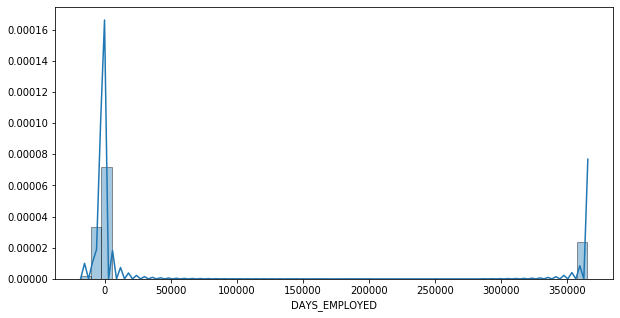

In [347]:
plt.figure(figsize=(10,5))
sns.distplot(df_application['DAYS_EMPLOYED'], hist_kws=dict(edgecolor="k"))

#### Analysis for DAYS_EMPLOYED
As seen in the above graph all the values for DAYS_EMPLOYED column are either negative or near the zero (0) except only one of 365,243. If we consider this value of 365,243 day employed it coverts in alomost 1000 years of service which absolutely not possible. This value is seems to be data entry error and we can safely consider this as an outlier.

#### Remove the outliers for above 3 columns by capping those on the basis of percentile values

In [348]:
outlier_col_list = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL']
for col in outlier_col_list:
    percentiles = df_application[col].quantile([0.01,0.99]).values    
    df_application[col] = np.clip(df_application[col], percentiles[0], percentiles[1])

As we know there is only one outlier for DAYS_EMPLOYED column and all other values are negative, we can simply remove this record to remove outlier.

In [349]:
df_application = df_application[df_application.DAYS_EMPLOYED != 365243]

#### Lets validate the data for these 3 columns after removing outlier using histogram

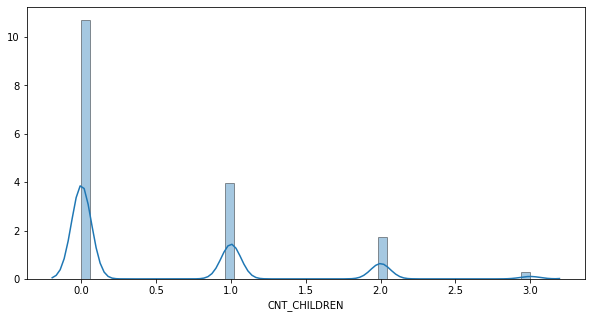

In [350]:
plt.figure(figsize=(10,5))
sns.distplot(df_application['CNT_CHILDREN'], hist_kws=dict(edgecolor="k"))

##### <u>Analysis Summary</u>: The majority of loan applicants don't have any child i.e. zero (0) number of children as seen in the above graph. The mjaority of applicants having child are having single child which almost double of applicant having 2 children.  Few of the applicatants is having  3 children whcih is very less in proportion to applicants having 1 or 2 chidren.

In [351]:
df_application['CNT_CHILDREN'].describe()

count   252137.00000
mean    0.49543     
std     0.74711     
min     0.00000     
25%     0.00000     
50%     0.00000     
75%     1.00000     
max     3.00000     
Name: CNT_CHILDREN, dtype: float64

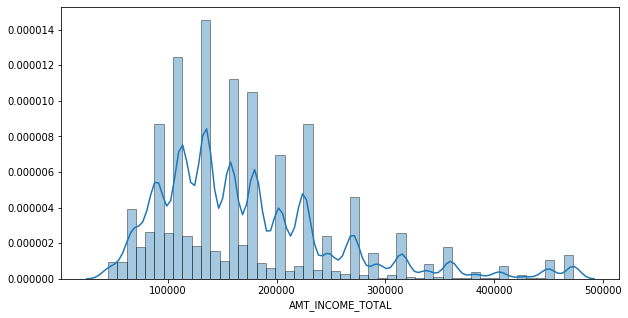

In [352]:
plt.figure(figsize=(10,5))
sns.distplot(df_application['AMT_INCOME_TOTAL'], hist_kws=dict(edgecolor="k"))

##### <u>Analysis Summary</u>: The regular total income ranges from 45,000 to approximately 300,000 though there are few total income vlaues instances up to 472,500. As we can see, there are few spikes in between 100K to 200K, which might be most common income ranges.

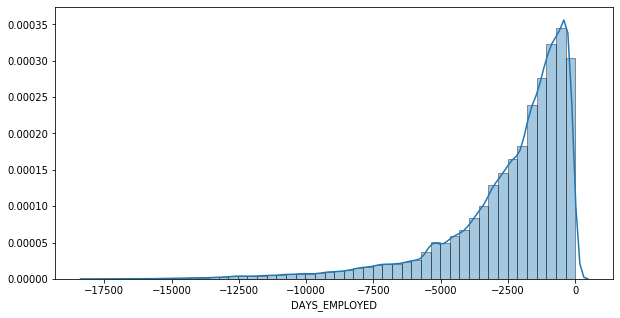

In [353]:
plt.figure(figsize=(10,5))
sns.distplot(df_application['DAYS_EMPLOYED'], hist_kws=dict(edgecolor="k"))

##### <u>Analysis Summary</u>: Based on the above graph we can derive the inference that maximum loan applicants are in early years of employment.

#### 3.6 Binning of continuous variables

We have decided to bin below two columns.
1. Credit Amount (AMT_CREDIT)
2. Total Income Amount (AMT_INCOME_TOTAL)

We have decided to classify credit amount and total income less than 33% as Low, 33% to 66% as Medium and values greater than 66% as High.

In [354]:
low_credit = df_application['AMT_CREDIT'].quantile(0.33)
medium_credit = df_application['AMT_CREDIT'].quantile(0.66)
high_credit = df_application['AMT_CREDIT'].quantile(1)
low_income = df_application['AMT_INCOME_TOTAL'].quantile(0.33)
medium_income = df_application['AMT_INCOME_TOTAL'].quantile(0.66)
high_income = df_application['AMT_INCOME_TOTAL'].quantile(1)

In [411]:
df_application.loc[df_application['AMT_CREDIT'] <= low_credit, 'BIN_AMT_CREDIT']='Low'
df_application.loc[(df_application['AMT_CREDIT'] > low_credit) & (df_application['AMT_CREDIT'] <= medium_credit), 'BIN_AMT_CREDIT'] = 'Medium'
df_application.loc[df_application['AMT_CREDIT'] > medium_credit, 'BIN_AMT_CREDIT']='High'

df_application.loc[df_application['AMT_INCOME_TOTAL'] <=low_income, 'BIN_AMT_INCOME_TOTAL']='Low'
df_application.loc[(df_application['AMT_INCOME_TOTAL'] > low_income) & (df_application['AMT_INCOME_TOTAL'] <= medium_income), 'BIN_AMT_INCOME_TOTAL'] = 'Medium'
df_application.loc[df_application['AMT_INCOME_TOTAL'] > medium_income, 'BIN_AMT_INCOME_TOTAL']='High'

In [412]:
df_application[['AMT_INCOME_TOTAL','AMT_CREDIT','BIN_AMT_INCOME_TOTAL','BIN_AMT_CREDIT']].head(20)

,AMT_INCOME_TOTAL,AMT_CREDIT,BIN_AMT_INCOME_TOTAL,BIN_AMT_CREDIT
0,202500.00000,406597.50000,High,Medium
1,270000.00000,1293502.50000,High,High
2,67500.00000,135000.00000,Low,Low
3,135000.00000,312682.50000,Medium,Low
4,121500.00000,513000.00000,Low,Medium
5,99000.00000,490495.50000,Low,Medium
6,171000.00000,1560726.00000,Medium,High
7,360000.00000,1530000.00000,High,High
9,135000.00000,405000.00000,Medium,Medium
10,112500.00000,652500.00000,Low,Medium


### 4. Analysis of application data set 

#### 4.1 Check the imbalnce percentage for application dataset based on Target column

In [356]:
## Categorical Columns
100*(df_application['TARGET'].value_counts()/ df_application.shape[0])

0   91.34003
1   8.65997 
Name: TARGET, dtype: float64

#### The dataset imbalance ratio is of 91.34 : 8.66

Let also analyse the target column data by plotting bar plot

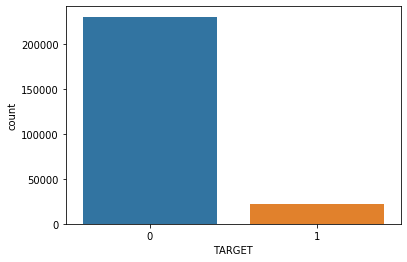

In [357]:
sns.countplot(x = 'TARGET', data=df_application)

<b><u>Data Analysis</u>:It is clear from the above graph and percent distribution for Target column that it is a <u>highly imbalanced dataset</u>. <br><br>Since, we cannot standardize such a large imbalanced dataset, we will spilt this dataset based on two target values for further data analysis.</b>

#### 4.2 Divide the application dataset based on Target column (Target=0 & Target=1)

In [358]:
#Split the application dataset into two difference dataframes based on traget column values.
df_application_success = df_application[df_application['TARGET'] < 1]
df_application_defaulted = df_application[df_application['TARGET'] >= 1]

In [359]:
print("Total {} applicants who repaid loan on-time.".format(df_application_success.shape[0]))
print("Total {} applicants who either defaulted or delayed loan repayment.".format(df_application_defaulted.shape[0]))

Total 230302 applicants who repaid loan on-time.
Total 21835 applicants who either defaulted or delayed loan repayment.


#### 4.3 Univariate Analysis for Categorial variables for both datasets  (target 0 and 1)

<b> Univariate Analysis for Gender column </b>

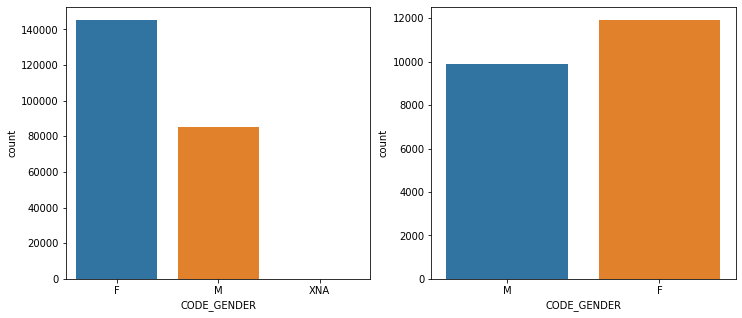

In [360]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data=df_application_success)
plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data=df_application_defaulted)

<b><u>Data Analysis for Gender (CODE_GENDER)</u>:The number of female clients in non-defaulted dataset is almost double of male clients.<br><br>
Lets calculate the ratio of defult for further analysis. <br>
</b>

In [462]:
male_default_percent = round(100*(len((df_application_defaulted[df_application_defaulted.CODE_GENDER == 'M']))/len((df_application_success[df_application_success.CODE_GENDER == 'M']))),2)
female_default_percent = round(100*(len((df_application_defaulted[df_application_defaulted.CODE_GENDER == 'F']))/len((df_application_success[df_application_success.CODE_GENDER == 'F']))),2)
print("Ratio of Loan Default between Male and Feamale is {0} : {1}".format(male_default_percent, female_default_percent))

Ratio of Loan Default between Male and Feamale is 11.66 : 8.21


<b><u>Analysis Summary</u>: Based on above defaulter ration calculation, we can infer that male clients have a higher chance of not returning their loans (12%), comparing with female clients (8%).</b>

<b> Univariate Analysis for Own Car Flag column </b>

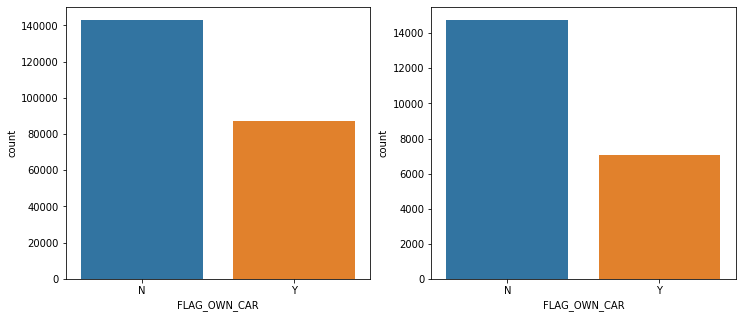

In [362]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data=df_application_success)
plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data=df_application_defaulted)

<b><u>Data Analysis for Own Car Flag (FLAG_OWN_CAR)</u>:It is clear from both graphs for dataset is almost half of the cleint don't own car.<br>
    
The clients that owns a car are less likely to default as compare to client who don't own a car.</b>

<b> Univariate Analysis for Income type column </b>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

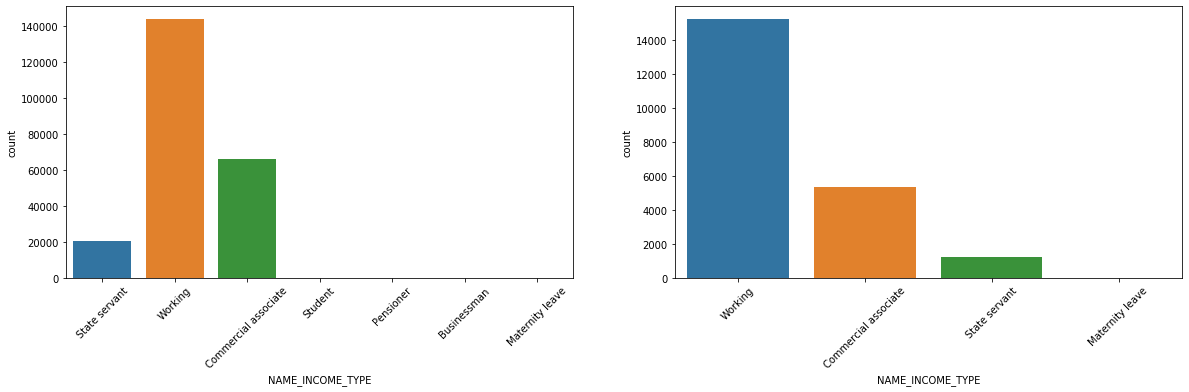

In [363]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data=df_application_success)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data=df_application_defaulted)
plt.xticks(rotation = 45)

<b><u>Data Analysis for Income type (NAME_INCOME_TYPE)</u>: From above graph it can be observed that  Applicants having Income Types as Working and Commercial associate has the highest percentage of clients.<br>

Based on the graph for dataset with payment diffculties, we can conclude that the same categories of income types i.e. Working and Commercial associate are having more payment problems, while Pensioners have the least (as you can see there is no Pensioners category in second graph).</b>

<b> Univariate Analysis for Education type </b>

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

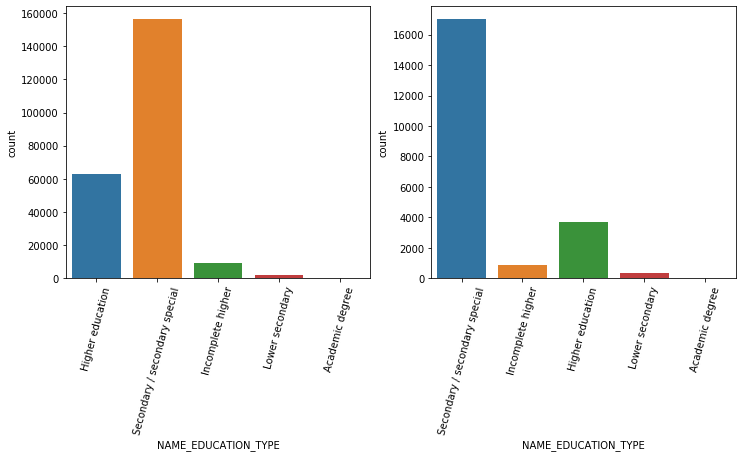

In [364]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data=df_application_success)
plt.xticks(rotation = 75)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data=df_application_defaulted)
plt.xticks(rotation = 75)

<b><u>Data Analysis for Education type (NAME_EDUCATION_TYPE)</u>: A large number of applications (approx. 150K) are filed by people having secondary education followed by people with Higher Education <br>

Based on the right side graph we can infer that the applicants with Lower Secondary education status has the highest percentage of payment related problems.</b>

<b> Univariate Analysis for Family Status </b>

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

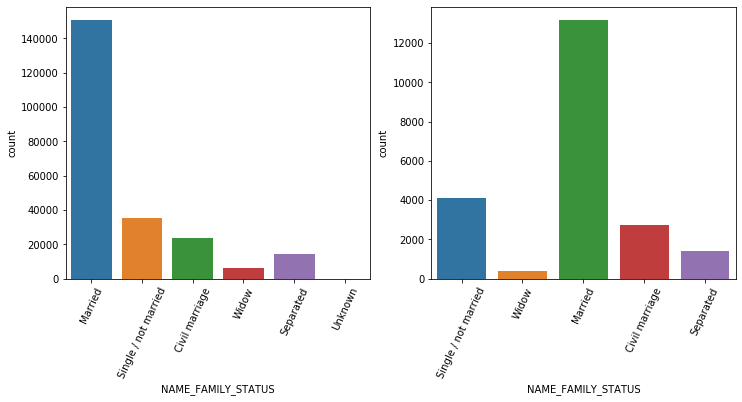

In [365]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data=df_application_success)
plt.xticks(rotation = 65)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data=df_application_defaulted)
plt.xticks(rotation = 65)

<b><u>Data Analysis for Family Status (NAME_FAMILY_STATUS)</u>: As seen in the above graphs, majority of clients are married followed by Single (not marrie) and Civil marraige.<br>

Client with Civil marriage category has the highest percent of repayment difficulties and clients in Widow category has the lowest.</b>

#### 4.4 Corelation for numeric columns for both datasets

<u>Heatmap of Feature Corelation for Target=0</u>

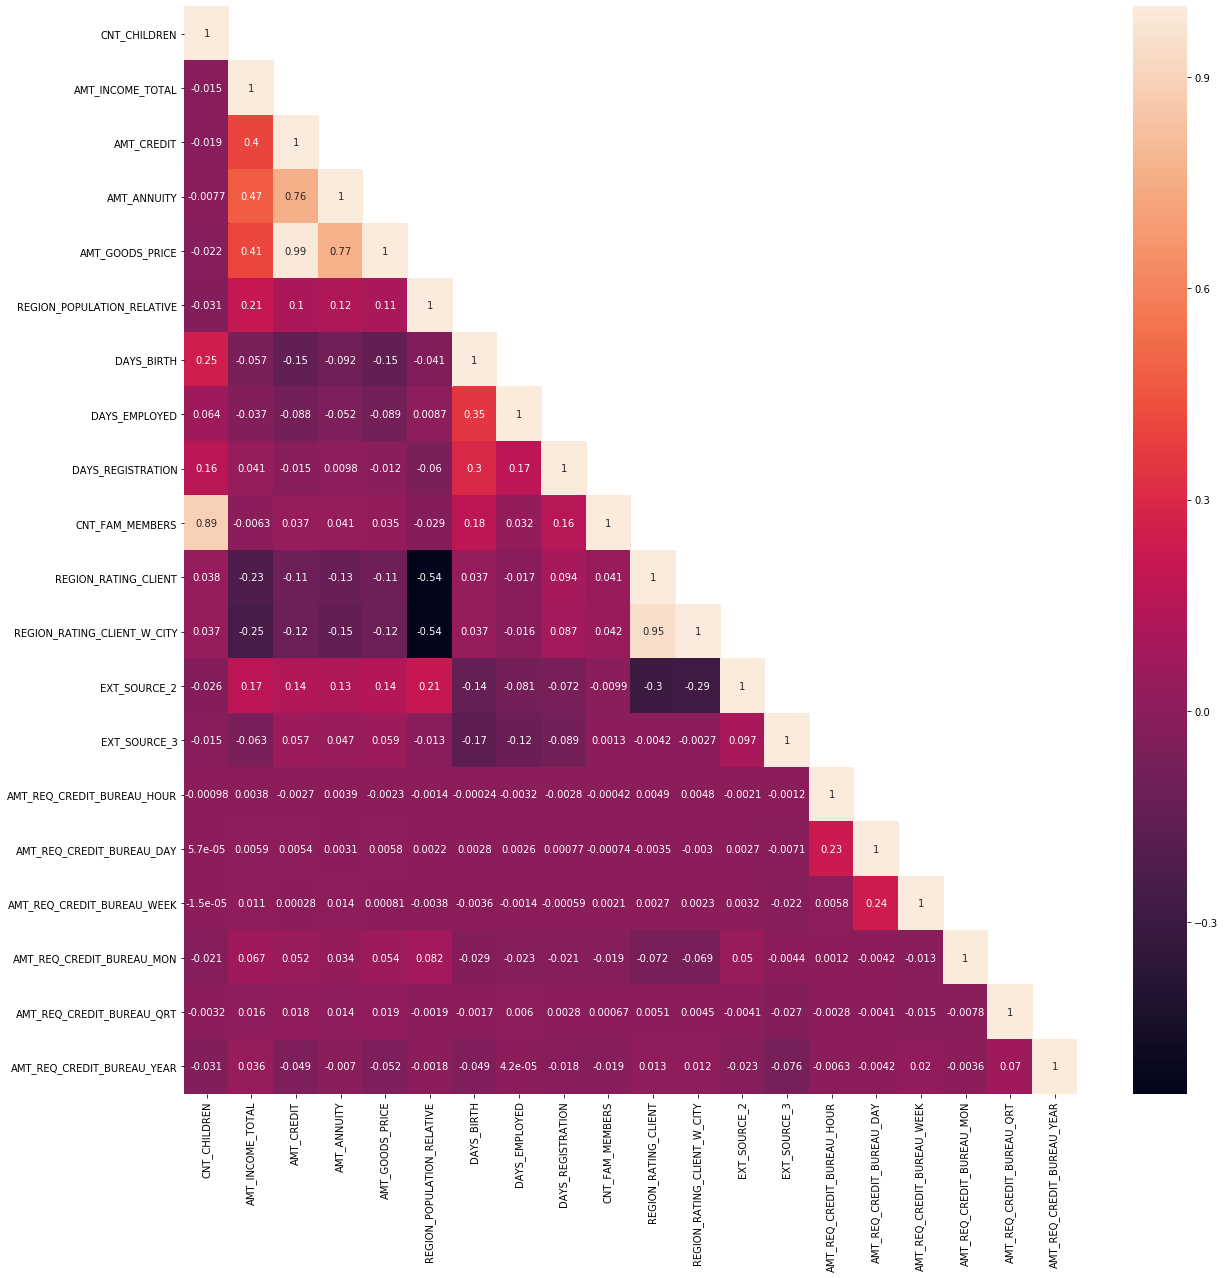

In [366]:
plt.figure(figsize=(20,20))
df_cor_target0 = df_application_success.copy()
# Remove SK_ID_CURR, TARGET, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE columns
col_remove_list = ['SK_ID_CURR', 'TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE']
df_cor_target0.drop(col_remove_list, axis=1, inplace=True)
df_cor_target0 = df_cor_target0.corr()
df_cor_target0 = df_cor_target0.where(np.triu(np.ones(df_cor_target0.shape), k=0).astype(np.bool))
sns.heatmap(df_cor_target0.T, annot =True)

<b><u>Data Analysis for highly corelated features for target=0</u></b>: <br>Based on analysis of above graph, we can say below 10 features are highly corelated.<br>
1. REGION_RATING_CLIENT
2. REGION_RATING_CLIENT_W_CITY
3. REGION_POPULATION_RELATIVE
4. DAYS_EMPLOYED
5. DAYS_BIRTH
6. EXT_SOURCE_2
7. EXT_SOURCE_3
8. AMT_CREDIT
9. AMT_INCOME_TOTAL
10. AMT_GOODS_PRICE

<u>Heatmap of Feature Corelation for Target=1</u>

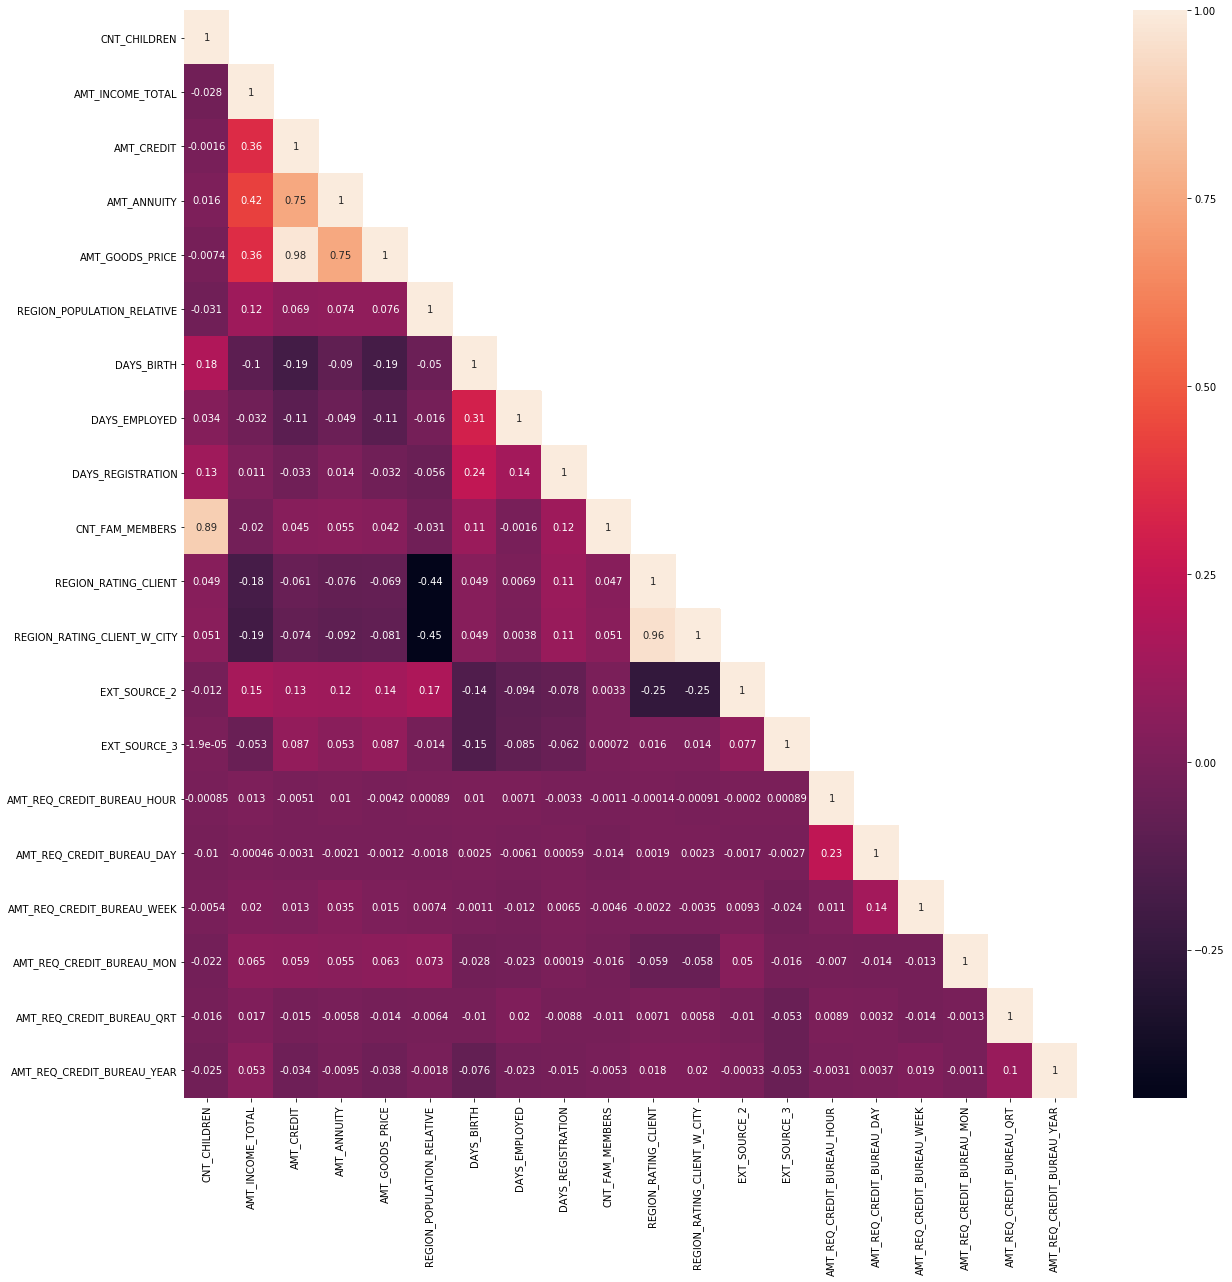

In [367]:
plt.figure(figsize=(20,20))
df_cor_target1 = df_application_defaulted.copy()
# Remove SK_ID_CURR, TARGET, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE columns
col_remove_list = ['SK_ID_CURR', 'TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE']
df_cor_target1.drop(col_remove_list, axis=1, inplace=True)
df_cor_target1 = df_cor_target1.corr()
df_cor_target1 = df_cor_target1.where(np.triu(np.ones(df_cor_target1.shape), k=0).astype(np.bool))
sns.heatmap(df_cor_target1.T, annot =True)

<b><u>Data Analysis for highly corelated features for target=0</u></b>: <br>Based on analysis of above graph, we can say below 10 features are highly corelated.<br>
1. REGION_RATING_CLIENT
2. REGION_RATING_CLIENT_W_CITY
3. REGION_POPULATION_RELATIVE
4. DAYS_EMPLOYED
5. DAYS_BIRTH
6. EXT_SOURCE_2
7. EXT_SOURCE_3
8. AMT_CREDIT
9. AMT_INCOME_TOTAL
10. AMT_GOODS_PRICE

#### 4.5 Comparision of highly corelated numeric columns in both datasets

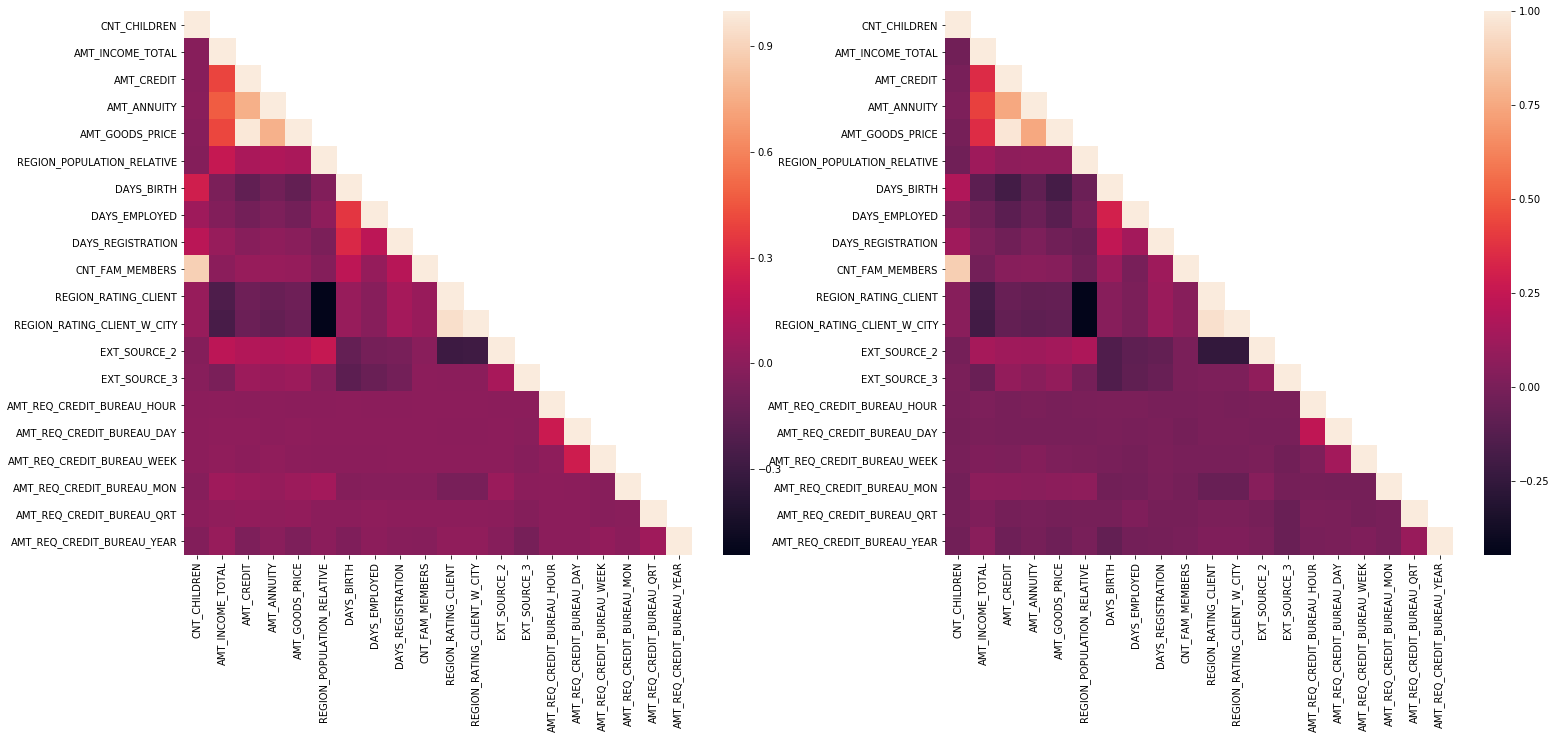

In [368]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.heatmap(df_cor_target0.T)
plt.subplot(1,2,2)
sns.heatmap(df_cor_target1.T)

<b><u>Data Analysis for highly corelated features for both targets 0 and 1</u></b>
<br>Based on analysis of above side by heatmaps showing corelation for both targets 0 and 1, we can conclude that the <b>highest corelation features are similar in both the datasets.</b>

#### 4.6 Univariate Analysis for numerical variables for both datasets (target 0 and 1)

<b> Univariate Analysis for Age (Birth Days) </b>

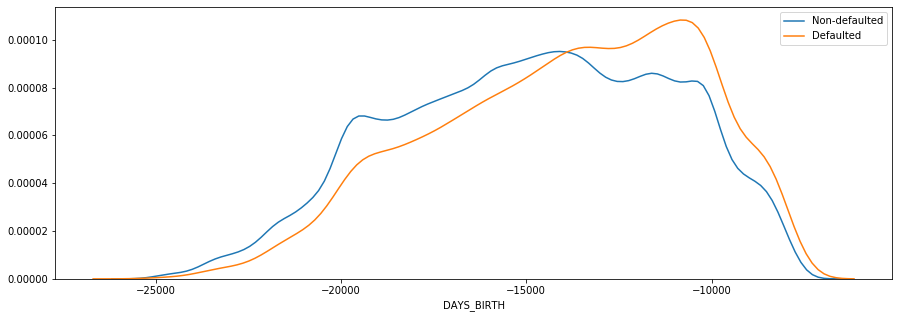

In [369]:
plt.figure(figsize=(15,5))
sns.distplot(df_application_success['DAYS_BIRTH'], hist = False, label='Non-defaulted')
sns.distplot(df_application_defaulted['DAYS_BIRTH'], hist = False, label='Defaulted')

<b><u>Data Analysis for Age (DAYS_BIRTH)</u>:The age range for applicants is between 20 to 69 years approximately. <br><br>
As it can be seen in  the above graph, clients with are payment difficulties are concentrated in the age group of 25 to 35 years. The payment difficulties are then gradually decreasing as the age increases.</b>

<b> Univariate Analysis for Days Employeed) </b>

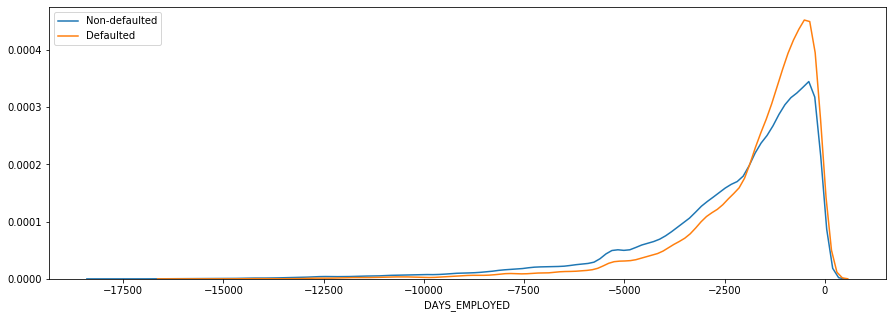

In [370]:
plt.figure(figsize=(15,5))
sns.distplot(df_application_success['DAYS_EMPLOYED'], hist = False, label='Non-defaulted')
sns.distplot(df_application_defaulted['DAYS_EMPLOYED'], hist = False, label='Defaulted')

<b><u>Data Analysis for Days Employeed (DAYS_EMPLOYED)</u>:The employment duration for applicants is approximately ranges between 0 to 30 years. <br><br>
Looking at the spike in the graph we can conclude that majority of applicants between 0-6 year are having difficulties in making repayment of load. The number of defaulter get reduced as the employment duration increased.</b>

<b> Univariate Analysis for Total Income Amount </b>

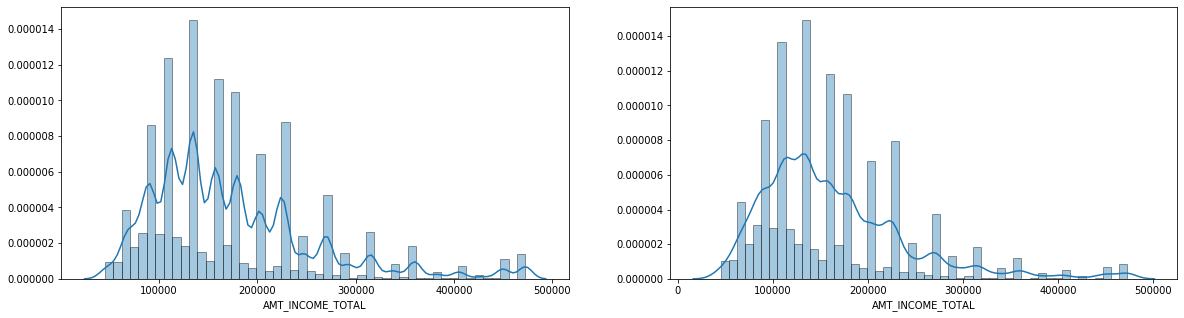

In [371]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df_application_success['AMT_INCOME_TOTAL'], label='Non-defaulted', hist_kws=dict(edgecolor="k"))
plt.subplot(1,2,2)
sns.distplot(df_application_defaulted['AMT_INCOME_TOTAL'], label='Defaulted', hist_kws=dict(edgecolor="k"))

<b><u>Data Analysis for Total Income Amount (AMT_INCOME_TOTAL)</u>: As seen in the above graphs, after removing outliers from total income data, clients taking loan fall in income range from 45000 to 472500.<br>

Looking at the spikes in between income ranges approximately from 80K to 250K, we can derive conclusion that client with the income ranges between 80K-250K are going applying for loan. </b>

<b> Univariate Analysis for Children Count </b>

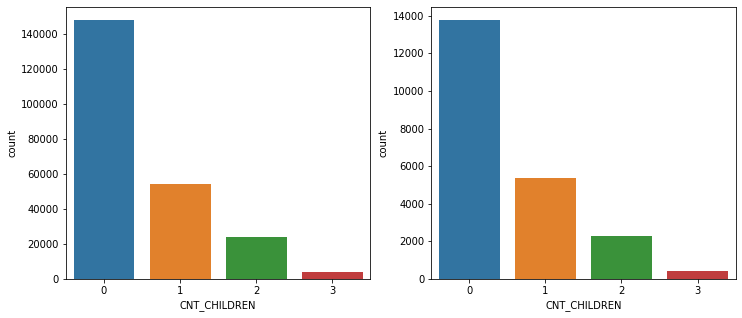

In [372]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'CNT_CHILDREN', data=df_application_success)
plt.subplot(1,2,2)
sns.countplot(x = 'CNT_CHILDREN', data=df_application_defaulted)

<b><u>Data Analysis for Children Count (CNT_CHILDREN)</u>: Based on analysis of above graphs, it is cleat that majority of client doesn't have any children<br>

When we calculated the percentage of defaulter, we observed that if person is having more children then chances of loan payment become less. This might be because of the income and number of dependents ratio in the home. </b>

<b> Univariate Analysis for Family Count </b>

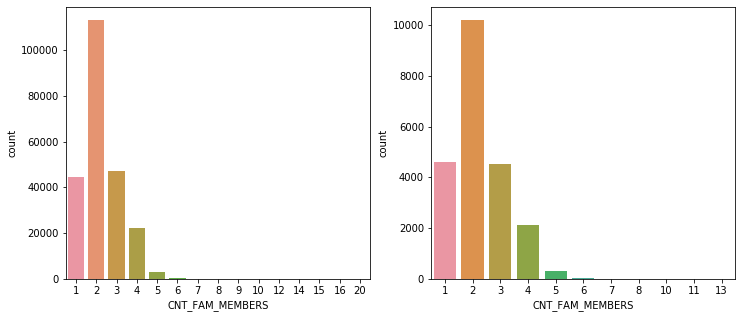

In [373]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'CNT_FAM_MEMBERS', data=df_application_success)
plt.subplot(1,2,2)
sns.countplot(x = 'CNT_FAM_MEMBERS', data=df_application_defaulted)

<b><u>Data Analysis for Family member count (CNT_FAM_MEMBERS)</u>: Majority of the clients who applied fo loan has two (2) family members followed by 3 and 1. </b>

#### 4.6 Bivariate Analysis for numerical and categorial variables for both datasets (target 0 and 1)

Loan amount (Continuous variable) based on Education type (Categorial variable)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

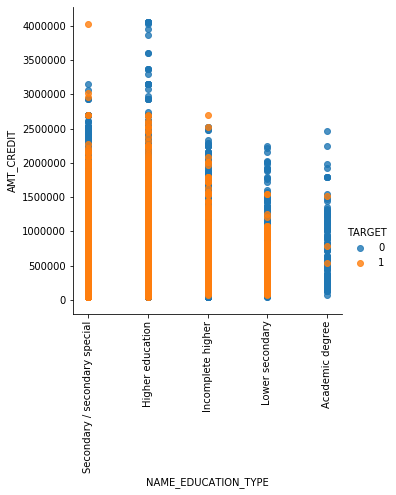

In [409]:
sns.lmplot('NAME_EDUCATION_TYPE','AMT_CREDIT', data = df_application, hue = 'TARGET' ,fit_reg = False)
plt.xticks(rotation = 90)

<b><u>Analysis Summary</u></b>: As seen from above graph, highest credit amount (400K+) is given to client with higher education followed by Secondary education level.<br>
<b><i>We can clearly see that the lowest loan amount is given to clients in Lower Secondary education type. Also, above graph revels the interesting fact that clients in Academic degree has lowest loan defaulted percentage.</i></b>

Loan amount (Continuous variable) based on Loan annuity (Continuous variable)

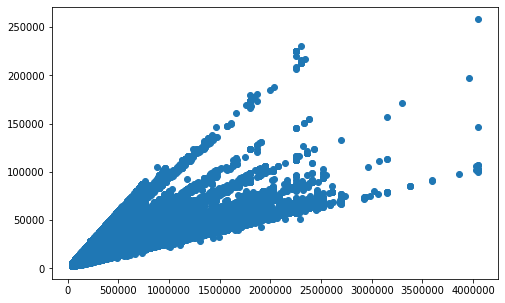

In [423]:
plt.figure(figsize=(8,5))
plt.scatter(df_application['AMT_CREDIT'], df_application['AMT_ANNUITY'])

<b><u>Analysis Summary</u></b>: It is clear from above scatter chart that there is positive correlation between loan amount and annuity amount. That means larger the amount of annuity, client will get that much of bigger loan sanctioned.</b>

Loan repayment difficulties based on Education Type (categorial variable)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

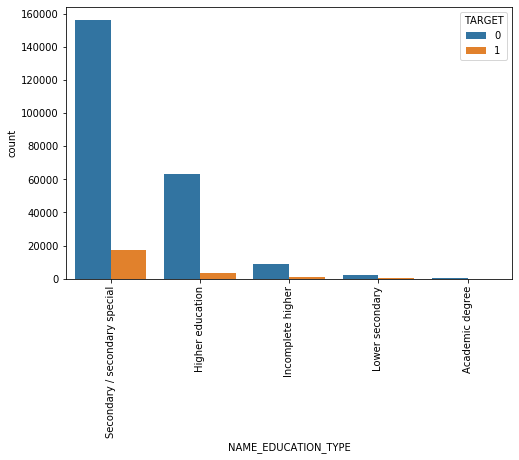

In [419]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'NAME_EDUCATION_TYPE', data=df_application, hue='TARGET')
plt.xticks(rotation = 90)

<b><u>Analysis Summary</u></b>: A large number of applications (~150K) are filed by people having secondary education followed by people with Higher Education with ~60K applications. <br>
<b><i>We see that the applicants with Lower Secondary education status has the highest percentage of payment related problems.</i></b>

Loan repayment difficulties based on Occupation Type (categorial variable)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

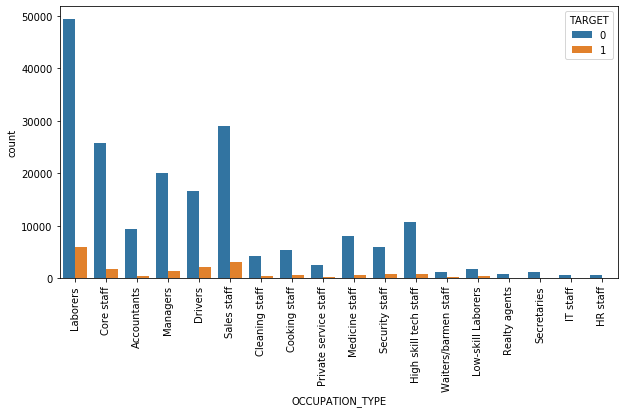

In [393]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'OCCUPATION_TYPE', data=df_application, hue='TARGET')
plt.xticks(rotation = 90)

<b><u>Analysis Summary</u>: Based on analysis of above graph, we can conclude that laborer’s (49k+), Sales (29k+) ,core staff (~26k) has highest number of loan applications. However, when it comes to loan repayment difficulties, highest number can be seen in Low-skill laborer’s(16%),Drivers,Waiters,cookin staff and so on… </b>

### 5. Read "Previous Application" data

In [424]:
df_pre_application = pd.read_csv ('Previous_application.csv')
df_pre_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


Indentify common columns to merge the application and previous application dataset

In [443]:
df_app_tmp = df_application[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',\
                             'FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT',\
                             'AMT_ANNUITY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',\
                             'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED',\
                             'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',\
                             'ORGANIZATION_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','AMT_REQ_CREDIT_BUREAU_YEAR']].copy()
df_prev_app_tmp = df_pre_application[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_APPLICATION',\
                                      'AMT_CREDIT','WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE',\
                                      'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE',\
                                      'NAME_CLIENT_TYPE','NFLAG_INSURED_ON_APPROVAL']].copy()

#### 5.1 Merge the application and previous application datasets

In [444]:
# df_merged = pd.merge(df_app_tmp, df_prev_app_tmp, on='SK_ID_CURR', how='inner')
df_merged = pd.merge(df_prev_app_tmp, df_app_tmp, on='SK_ID_CURR', how='inner')

Validate the merged dataset

In [445]:
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_APPLICATION,AMT_CREDIT_x,WEEKDAY_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,AMT_REQ_CREDIT_BUREAU_YEAR
0,2030495,271877,Consumer loans,17145.00000,17145.00000,SATURDAY,XAP,Approved,Cash through the bank,NaN,Repeater,0.00000,0,Cash loans,F,N,Y,1,225000.00000,533668.50000,25803.00000,State servant,Incomplete higher,Married,House / apartment,0.04622,-14443,-7392,NaN,3,1,Military,1,1,0.00000
1,1696966,271877,Consumer loans,1800000.00000,1754721.00000,SATURDAY,XAP,Refused,Cash through the bank,NaN,Repeater,nan,0,Cash loans,F,N,Y,1,225000.00000,533668.50000,25803.00000,State servant,Incomplete higher,Married,House / apartment,0.04622,-14443,-7392,NaN,3,1,Military,1,1,0.00000
2,2154916,271877,Consumer loans,108400.50000,119848.50000,SUNDAY,XAP,Approved,Cash through the bank,NaN,New,0.00000,0,Cash loans,F,N,Y,1,225000.00000,533668.50000,25803.00000,State servant,Incomplete higher,Married,House / apartment,0.04622,-14443,-7392,NaN,3,1,Military,1,1,0.00000
3,2802425,108129,Cash loans,607500.00000,679671.00000,THURSDAY,XNA,Approved,XNA,Unaccompanied,Repeater,1.00000,0,Revolving loans,F,N,N,0,90000.00000,135000.00000,6750.00000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.02516,-21335,-1255,Private service staff,2,2,Self-employed,1,1,1.89997
4,1536272,108129,Cash loans,450000.00000,512370.00000,WEDNESDAY,XNA,Approved,XNA,NaN,Repeater,1.00000,0,Revolving loans,F,N,N,0,90000.00000,135000.00000,6750.00000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.02516,-21335,-1255,Private service staff,2,2,Self-employed,1,1,1.89997


#### 5.2 Univariate and Bivariate Analysis on merged dataset

<b>Univariate Analysis of Contract Status</b>

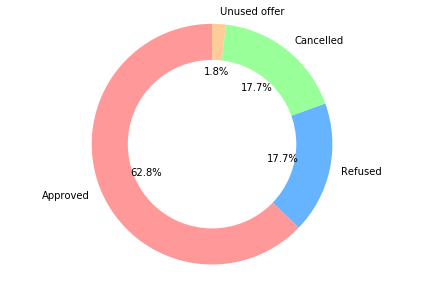

In [446]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Approved', 'Refused','Cancelled', 'Unused offer'] 
fig1, ax1 = plt.subplots()
ax1.pie(df_merged['NAME_CONTRACT_STATUS'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<b><u>Analysis Summary</u></b>: A large number (62.8%) of contracts get approved. Almost similar percent (17.7%) of contacts get either cancelled or refused. Very small portion (1.8%) of contracts are cancelled by clients during different stages of the process.

<b>Univariate Analysis of Contract Type</b>

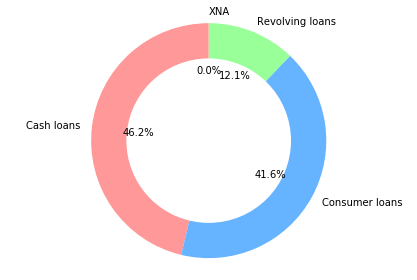

In [452]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Cash loans', 'Consumer loans', 'Revolving loans', 'XNA'] 
fig1, ax1 = plt.subplots()
ax1.pie(df_merged['NAME_CONTRACT_TYPE_x'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<b><u>Analysis Summary</u></b>: A major contribution of previous load application type is Cash loans (46.2%) and Consumer loans (41.6%). Smaller 12.1 percentage are applicants taken Revolving loan contract. 

<b><i>Based on this we can conclude that majority of loans are contributed by personal loan and consumer durable loans such as loan for buying electronics appliances or gadgets.</i></b>

<b>Univariate Analysis of Client Type</b>

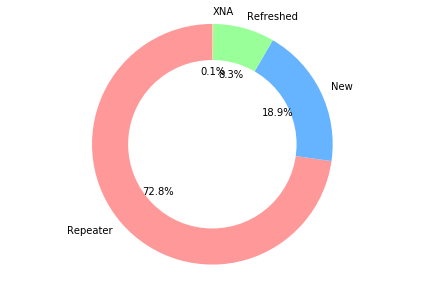

In [454]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = ['Repeater', 'New','Refreshed', 'XNA'] 
fig1, ax1 = plt.subplots()
ax1.pie(df_merged["NAME_CLIENT_TYPE"].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<b><u>Analysis Summary</u></b>: There are 72.8% of repeater client who has records in previous application dataset.

<b><i>This revels the important trend in credit business that previous customer applied and approved for loans has greater chance to provide the repeat business.</i></b>

<b>Univariate Analysis of Insurance </b>

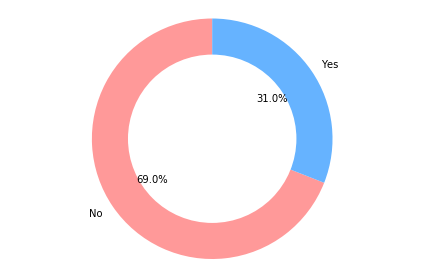

In [457]:
#colors
colors = ['#ff9999','#66b3ff']
labels = ['No', 'Yes'] 
fig1, ax1 = plt.subplots()
ax1.pie(df_merged["NFLAG_INSURED_ON_APPROVAL"].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<b><u>Analysis Summary</u></b>: Majority (69%) client didn't request insurance during the previous application. 

<b><i>Based on this we can conclude that insuring loan is still catching up busienss with potential scope for improvement.</i></b>

<b>Bivariate Analysis of Contract Status depending on Contract Type </b>

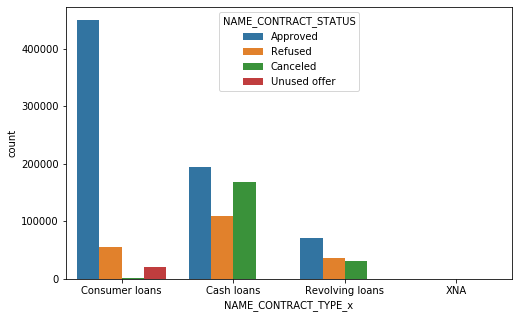

In [459]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'NAME_CONTRACT_TYPE_x', data=df_merged, hue='NAME_CONTRACT_STATUS')
# plt.xticks(rotation = 90)

<b><u>Analysis Summary</u></b>: The largest percent of approved loans belongs to Consumer loan category followed by Cash loans.

<b><i>Based on this we can conclude that majority of loans are contributed by personal loan and consumer durable loans such as loan for buying electronics appliances or gadgets.</i></b>

<b>Bivariate Analysis of Appliation Amount (continuous variable) with respect to Client Type (Categorial variable)</b>

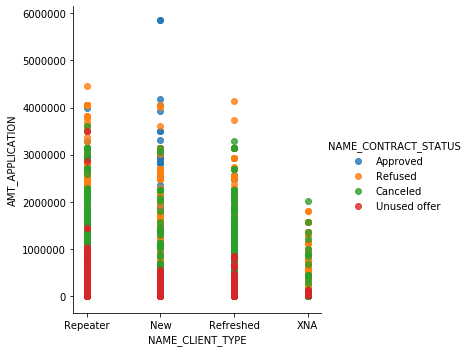

In [461]:
sns.lmplot('NAME_CLIENT_TYPE','AMT_APPLICATION', data = df_merged, hue = 'NAME_CONTRACT_STATUS' ,fit_reg = False)

<b><u>Analysis Summary</u></b>: A large portion of application amount is contributed by Repeater client followed by new client type.

### 6. Final Analysis Summary

We have summerized all the Credit EDA findings in slide deck which is included in the ZIP file along with this notebook.